<hr id="import">

<h2>1. Data Collection</h2>

<h4>Importing libraries</h4> 

In [39]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px
import time
from sklearn.manifold import TSNE
import seaborn as sns
RANDOM_SEED = 42
LABELS = ["Normal", "air blockage", "air leakage"]

<h4>Importing Dataset</h4>

In [40]:
# load the data
df = pd.read_csv('Pronto data_project 3.csv')
df.head()

Hour of day  FT305/OUT.CV  FT302/OUT.CV  FT305/AI2/OUT.CV  PT312/OUT.CV  \
0            3     99.791138      0.002018         16.464531      1.157051   
1           21     99.843597      0.001718         16.465521      1.157019   
2           11     99.848373      0.001418         16.466499      1.156986   
3           12     99.824516      0.001118         16.467489      1.156954   
4           20     99.772057      4.008060         16.468470      1.156922   

   FT102/OUT.CV  FT104/OUT.CV  FT102/AI3/OUT.CV  FT102/AI2/OUT.CV  \
0      0.000150      0.008799          18.75639        998.257629   
1      0.000151      0.008799          18.75639        998.257812   
2      0.000152      0.008799          18.51083        998.257996   
3      0.000153      0.008799          18.51083        998.258179   
4      0.000154      0.008800          18.51083        998.258301   

   PT417/OUT.CV  ...  FIC302/PID1/PV.CV  FIC301/PID1/OUT.CV  \
0      1.131950  ...          99.691002                 0.0   
1      1.131800  ...          99.745041                 0.0   
2      1.131650  ...          99.799088                 0.0   
3      1.131646  ...          99.853127                 0.0   
4      1.131642  ...          99.797951                 0.0   

   FIC301/PID1/SP.CV  FIC301/PID1/PV.CV  FIC102/PID1/OUT.CV  \
0            100.001           0.002018                 0.0   
1            100.001           0.001718                 0.0   
2            100.001           0.001418                 0.0   
3            100.001           0.001118                 0.0   
4            100.001           4.008060                 0.0   

   FIC102/PID1/SP.CV  FIC102/PID1/PV.CV  FIC101/PID1/OUT.CV  \
0                0.0           0.000150                 0.0   
1                0.0           0.000151                 0.0   
2                0.0           0.000152                 0.0   
3                0.0           0.000153                 0.0   
4                0.0           0.000154                 0.0   

   FIC101/PID1/SP.CV  FIC101/PID1/PV.CV  
0                0.0           0.008799  
1                0.0           0.008799  
2                0.0           0.008799  
3                0.0           0.008799  
4                0.0           0.008800  

[5 rows x 32 columns]

<hr id="clean">

<h2>2. Data Cleaning and Preparation</h2>

<h3 id="clean-missing">Handle missing values</h3>

<h4>Identify missing values</h4>

In [4]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13942 non-null  int64  
 1   FT305/OUT.CV           13908 non-null  float64
 2   FT302/OUT.CV           13879 non-null  float64
 3   FT305/AI2/OUT.CV       13874 non-null  float64
 4   PT312/OUT.CV           13940 non-null  float64
 5   FT102/OUT.CV           13925 non-null  float64
 6   FT104/OUT.CV           13938 non-null  float64
 7   FT102/AI3/OUT.CV       13837 non-null  float64
 8   FT102/AI2/OUT.CV       13887 non-null  float64
 9   PT417/OUT.CV           13813 non-null  float64
 10  PT408/OUT.CV           13850 non-null  float64
 11  PT403/OUT.CV           13908 non-null  float64
 12  FT404/OUT.CV           13901 non-null  float64
 13  FT406/OUT.CV           13912 non-null  float64
 14  PT501/OUT.CV           13895 non-null  float64
 15  PI

In [41]:
# find the number of missing values in each column
df.isna().sum()

Hour of day                0
FT305/OUT.CV              34
FT302/OUT.CV              63
FT305/AI2/OUT.CV          68
PT312/OUT.CV               2
FT102/OUT.CV              17
FT104/OUT.CV               4
FT102/AI3/OUT.CV         105
FT102/AI2/OUT.CV          55
PT417/OUT.CV             129
PT408/OUT.CV              92
PT403/OUT.CV              34
FT404/OUT.CV              41
FT406/OUT.CV              30
PT501/OUT.CV              47
PIC501/PID1/OUT.CV       134
LI502/OUT.CV              47
LI503/OUT.CV             139
LVC502-SR/PID1/OUT.CV    107
LI101/OUT.CV              90
FIC302/PID1/OUT.CV        35
FIC302/PID1/SP.CV        128
FIC302/PID1/PV.CV         61
FIC301/PID1/OUT.CV        37
FIC301/PID1/SP.CV         62
FIC301/PID1/PV.CV         83
FIC102/PID1/OUT.CV       133
FIC102/PID1/SP.CV         62
FIC102/PID1/PV.CV        129
FIC101/PID1/OUT.CV       112
FIC101/PID1/SP.CV         60
FIC101/PID1/PV.CV        102
dtype: int64

<h4>replace rows with "NaN" from certain columns with MEAN</h4>

In [43]:
# replace the missing values in the input columns with the mean of the previous and next values
df.interpolate(method='linear', inplace=True)


<h4>Validate cleaned data</h4>

In [44]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13942 non-null  int64  
 1   FT305/OUT.CV           13942 non-null  float64
 2   FT302/OUT.CV           13942 non-null  float64
 3   FT305/AI2/OUT.CV       13942 non-null  float64
 4   PT312/OUT.CV           13942 non-null  float64
 5   FT102/OUT.CV           13942 non-null  float64
 6   FT104/OUT.CV           13942 non-null  float64
 7   FT102/AI3/OUT.CV       13942 non-null  float64
 8   FT102/AI2/OUT.CV       13942 non-null  float64
 9   PT417/OUT.CV           13942 non-null  float64
 10  PT408/OUT.CV           13942 non-null  float64
 11  PT403/OUT.CV           13942 non-null  float64
 12  FT404/OUT.CV           13942 non-null  float64
 13  FT406/OUT.CV           13942 non-null  float64
 14  PT501/OUT.CV           13942 non-null  float64
 15  PI

In [45]:
# check for duplicates
df.duplicated().sum()

4

<h3>Principle Component Analysis (PCA)</h3>

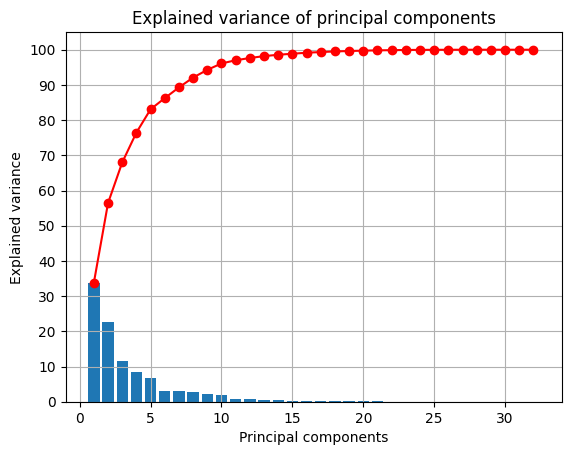

In [46]:
from sklearn.decomposition import PCA

# calculate principal components and plot explained variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pipe.fit(df)

# explained variance %
explained_variance = pipe.named_steps['pca'].explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

# plot the explained variance % as bar chart
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.title('Explained variance of principal components')
plt.show()

<h3>perform dimensionality reduction and visualize PCs</h3>

In [47]:

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Create a dataframe
X = pd.DataFrame(df)

# Transform the data
X_transformed = pipe.fit_transform(X)

# Create DataFrame with transformed data
df_PCA = pd.DataFrame(X_transformed, columns=['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
df_PCA['class'] = 0



In [48]:
df_PCA.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859493   
1 -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2 -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3 -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4 -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   

        pc8       pc9      pc10  class  
0 -0.406295 -0.530092  0.814198      0  
1 -0.172786 -0.574821  0.837007      0  
2 -0.334878 -0.503665  0.822055      0  
3 -0.322318 -0.509447  0.826018      0  
4 -0.221996 -0.523339  0.835800      0

<h1>1</h1>

<h1>2</h1>

<h1>2--</h1>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 3 build and train a GMM for anomaly detection</h2>

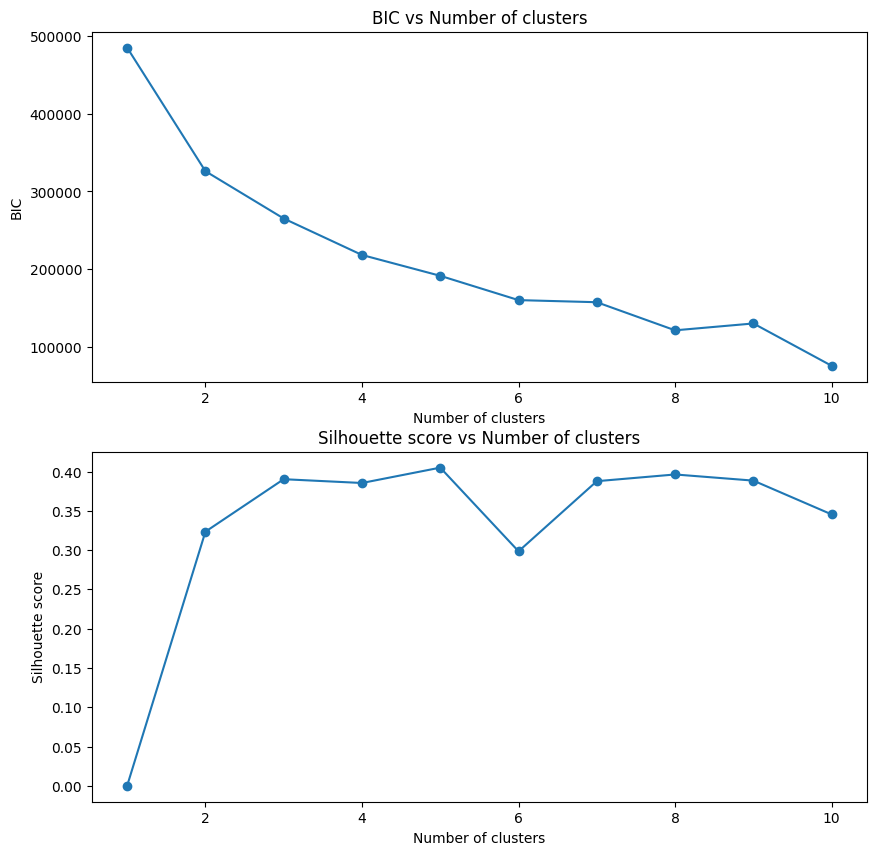

In [51]:
# TODO: determine the optimal number of clusters using the BIC elbow method for GMM
# train the model using only normal conditions data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

BICs = []
silhouettes = [0]
X = df_PCA.drop('class', axis=1)
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    BICs.append(gmm.bic(X))
    if i > 1:
        silhouettes.append(silhouette_score(X, gmm.predict(X)))

# plot the BICs
# subplot 1: BIC
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of clusters')

# subplot 2: silhouette score
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')

plt.show()


In [52]:
# TODO: build the GMM model with the optimum number of components
gmm = GaussianMixture(n_components=3, random_state=42)

# TODO: train the model using only the normal data
X = df_PCA
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

<h1>3</h1>

<h1>4</h1>

<h1>5</h1>

In [53]:
df_PCA.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859493   
1 -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2 -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3 -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4 -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   

        pc8       pc9      pc10  class  
0 -0.406295 -0.530092  0.814198      0  
1 -0.172786 -0.574821  0.837007      0  
2 -0.334878 -0.503665  0.822055      0  
3 -0.322318 -0.509447  0.826018      0  
4 -0.221996 -0.523339  0.835800      0

In [58]:
# Fit Gaussian Mixture Model to the anomalies
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming your data is stored in the variable X
# X should be a numpy array or pandas DataFrame

# Fit the GMM model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df_PCA)

# Get the predicted labels for each data point
labels = gmm.predict(df_PCA)

# Find the cluster with the highest probability for each data point
probs = gmm.predict_proba(df_PCA)
max_probs = np.max(probs, axis=1)

# Define a threshold for classifying anomalies
threshold = 0.99 # Adjust this threshold as needed

# Separate the data into normal and anomaly clusters
normal_data = X[max_probs >= threshold]
anomaly_data = X[max_probs < threshold]



gmm = GaussianMixture(n_components=2, random_state=RANDOM_SEED)
gmm.fit(anomaly_data)

# Predict the cluster labels for the anomalies
anomaly_labels = gmm.predict(anomaly_data)

# Add the cluster labels to the anomaly_data DataFrame
anomaly_data['Cluster'] = anomaly_labels

# Separate the anomalies into two clusters
cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]
cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]
# Number of normal data
num_normal_data = len(X_transformed)
print("Number of normal data:", num_normal_data)

# Number of anomaly data in cluster 1
num_anomaly_cluster_1 = len(anomaly_data[anomaly_data['Cluster'] == 0])
print("Number of anomaly data in cluster 1:", num_anomaly_cluster_1)

# Number of anomaly data in cluster 2
num_anomaly_cluster_2 = len(anomaly_data[anomaly_data['Cluster'] == 1])
print("Number of anomaly data in cluster 2:", num_anomaly_cluster_2)

# Create a new column 'Cluster' in df_PCA
df_PCA['Cluster'] = 2  # Set all values to 2 initially

# Update cluster labels for anomalies
anomaly_indices = anomaly_data.index
df_PCA.loc[anomaly_indices, 'Cluster'] = anomaly_labels

# Print the updated DataFrame
print(df_PCA)

anomaly_data.to_csv('anomaly_data.csv', index=False)










Number of normal data: 13942
Number of anomaly data in cluster 1: 9
Number of anomaly data in cluster 2: 12
            pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859493   
1     -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2     -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3     -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4     -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   
...         ...       ...       ...       ...       ...       ...       ...   
13937 -2.198710 -5.171426  0.002063  0.452960 -2.029779  0.878144 -0.502760   
13938  4.559815  0.377616 -1.697474 -1.139130  1.265451  0.864924 -0.503272   
13939  1.397748  2.804139  1.037645  0.480025 -2.122795 -0.102493 -0.097325   
13940 -2.856546  0.039680 -1.981884  0.503950  0.127206  0.744723 -0.460423   
13941  2.679535 -5.5969

C:\Users\Nagdy\AppData\Local\Temp\ipykernel_29016\1824063250.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
import matplotlib.pyplot as plt
import plotly.express as px

# Create a DataFrame for normal data
normal_data = X[X['Cluster'] == 2]

# Create a DataFrame for anomalies in cluster 1
anomaly_cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]

# Create a DataFrame for anomalies in cluster 0
anomaly_cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]

# Create a 3D scatter plot
fig = px.scatter_3d(normal_data, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster')
fig.add_trace(px.scatter_3d(anomaly_cluster_1, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster').data[0])
fig.add_trace(px.scatter_3d(anomaly_cluster_0, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster').data[0])

# Show the plot
fig.show()


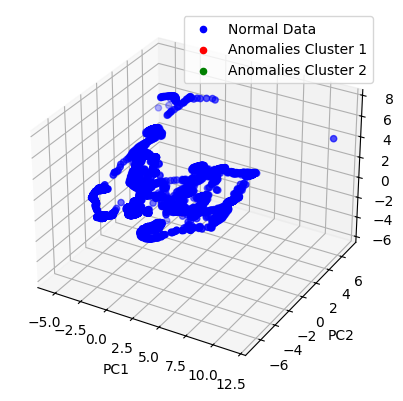

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot normal data
normal_data = X[X['Cluster'] == 2]
ax.scatter(normal_data['pc1'], normal_data['pc2'], normal_data['pc3'], c='blue', label='Normal Data')

# Plot anomalies in cluster 1
anomalies_cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]
ax.scatter(anomalies_cluster_1['pc1'], anomalies_cluster_1['pc2'], anomalies_cluster_1['pc3'], c='red', label='Anomalies Cluster 1')

# Plot anomalies in cluster 2
anomalies_cluster_2 = anomaly_data[anomaly_data['Cluster'] == 0]
ax.scatter(anomalies_cluster_2['pc1'], anomalies_cluster_2['pc2'], anomalies_cluster_2['pc3'], c='green', label='Anomalies Cluster 2')

# Set labels and legend
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()


<h1>5--</h1>

<h3> Calculating the Mean and Var and compare to identify which anomaly is the blockage or leakage</h3>

<h4>Load the faulty data</h4>

In [100]:
df_block = pd.read_csv('Class2..air blockage.csv')
df_leak  = pd.read_csv('Classs 1..air leakage.csv')

# drop class column 
df_block = df_block.drop(['class'], axis=1)
block_dataframe = pd.DataFrame(df_block)
df_leak = df_leak.drop(['class'], axis=1)
leak_dataframe = pd.DataFrame(df_leak)

# Define a new pipeline without the 'Hour of day' feature
new_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Drop the 'Hour of day' feature from the original DataFrame before fitting the new pipeline
df_no_hour_of_day = df.drop('Hour of day', axis=1)

# Fit the new pipeline on the modified DataFrame
new_pipe.fit(df_no_hour_of_day)

# Transform test data using the new pipeline
data_pca_block = new_pipe.transform(df_block)
data_pca_leak = new_pipe.transform(df_leak)

# Create DataFrame with transformed data
df_pca_block = pd.DataFrame(data_pca_block, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_block['class'] = 1

df_pca_leak = pd.DataFrame(data_pca_leak, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_leak['class'] = 2

# Load the anomaly_data.CSV file into a DataFrame
anomaly_data = pd.read_csv('anomaly_data.CSV')

# Filter the DataFrame for cluster 0 and 1
cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]
cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]



In [101]:
cluster_0.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
3  -0.494947  0.226863 -1.893659 -0.886119  0.331135 -0.681070  0.319344   
5  -0.413975  0.250423 -1.881322 -0.946073  0.327265  0.066429 -0.185244   
6  -0.378136  0.259676 -1.881851 -0.973607  0.313843  0.066195 -0.184017   
7  -0.333601  0.151716 -1.834712 -0.988990  0.252559 -0.681261  0.328971   
11 -0.236536  0.072856 -1.795674 -1.104620  0.184469 -0.178772 -0.006895   

         pc8       pc9      pc10  class  Cluster  
3   1.803583 -0.779799 -0.418216      0        0  
5   1.690569 -0.747407 -0.447471      0        0  
6   1.678797 -0.739048 -0.455477      0        0  
7   1.750542 -0.665641 -0.428106      0        0  
11  1.731135 -0.564221 -0.452690      0        0

In [102]:
cluster_0=cluster_0.drop('Cluster', axis=1)
cluster_0.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
3  -0.494947  0.226863 -1.893659 -0.886119  0.331135 -0.681070  0.319344   
5  -0.413975  0.250423 -1.881322 -0.946073  0.327265  0.066429 -0.185244   
6  -0.378136  0.259676 -1.881851 -0.973607  0.313843  0.066195 -0.184017   
7  -0.333601  0.151716 -1.834712 -0.988990  0.252559 -0.681261  0.328971   
11 -0.236536  0.072856 -1.795674 -1.104620  0.184469 -0.178772 -0.006895   

         pc8       pc9      pc10  class  
3   1.803583 -0.779799 -0.418216      0  
5   1.690569 -0.747407 -0.447471      0  
6   1.678797 -0.739048 -0.455477      0  
7   1.750542 -0.665641 -0.428106      0  
11  1.731135 -0.564221 -0.452690      0

In [103]:
cluster_1=cluster_1.drop('Cluster', axis=1)
cluster_1.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.086060  0.616902 -2.299144 -0.850527 -0.114886  0.461575 -0.337353   
1  1.069867  0.580045 -2.309437 -0.887628 -0.132317  0.588229 -0.424048   
2 -0.545410  0.219050 -1.920747 -0.847868  0.327423  1.184689 -0.956422   
4 -0.447970  0.240741 -1.890277 -0.915006  0.329083  0.813663 -0.697435   
8 -0.292677  0.067977 -1.795589 -1.014349  0.208846  0.940169 -0.772729   

        pc8       pc9      pc10  class  
0 -0.204168  0.393699 -0.733523      0  
1 -0.159133  0.452348 -0.816610      0  
2  1.594703 -0.773398 -0.381290      0  
4  1.630765 -0.745860 -0.445453      0  
8  1.599080 -0.568782 -0.415880      0

In [104]:
df_pca_block.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.865935  3.998854  6.962863  2.580175  2.110754  0.304972 -0.715243   
1  1.661720  3.928694  7.080732  2.875848  2.442478  0.312965 -0.011646   
2  1.497115  3.343207  7.382823  3.430998  2.160893  0.294093  0.089644   
3  1.015539  3.168486  7.324308  3.831328  2.385468  0.282115  0.692641   
4  0.968342  2.787689  7.561775  4.300444  2.625586  0.277230  1.029086   

        pc8       pc9      pc10  class  
0 -0.679144  0.596211  4.822025      1  
1 -0.620425  0.051266  4.766006      1  
2 -0.761182  0.337843  5.340405      1  
3 -0.714716 -0.124902  4.940231      1  
4 -0.928498 -0.194967  4.726749      1

<h4> Calc Mean And Var</h4>

In [105]:
import numpy as np
from scipy.stats import ttest_ind, levene
from scipy.stats import levene
from numpy import ravel as flatten




# Calculate the mean and variance for both calculations
mean0, variance0 = np.mean(cluster_0), np.var(cluster_0)
mean1, variance1 = np.mean(cluster_1), np.var(cluster_1)
mean3_block,  variance3_block = np.mean(df_pca_block),  np.var(df_pca_block)
mean4_leak,   variance4_leak  = np.mean(df_pca_leak),   np.var(df_pca_leak)

# Print the mean and variance for both calculations
print(f"Cluster_0: Mean = {mean0},\n Variance = {variance0}")
print(f"Cluster_1: Mean = {mean1}, \nVariance = {variance1}")
print(f"Block: Mean = {mean3_block}, \nVariance = {variance3_block}")
print(f"Leak: Mean = {mean4_leak}, \nVariance = {variance4_leak}")

# Compare the means using a t-test
t_statistic, p_value = ttest_ind(cluster_0 , df_pca_block)
print(f"t-test: t = {t_statistic}, p = {p_value}")

t_statistic, p_value = ttest_ind(cluster_0 , df_pca_leak)
print(f"t-test: t = {t_statistic}, p = {p_value}")

t_statistic, p_value = ttest_ind(cluster_1 , df_pca_block)
print(f"t-test: t = {t_statistic}, p = {p_value}")

t_statistic, p_value = ttest_ind(cluster_1 , df_pca_leak)
print(f"t-test: t = {t_statistic}, p = {p_value}")

# Compare the variances using Levene's test
w_statistic, p_value = levene(flatten(cluster_0), flatten(df_pca_block))
print(f"Levene's test: W = {w_statistic}, p = {p_value}")

w_statistic, p_value = levene(flatten(cluster_0), flatten(df_pca_leak))
print(f"Levene's test: W = {w_statistic}, p = {p_value}")

w_statistic, p_value = levene(flatten(cluster_1), flatten(df_pca_block))
print(f"Levene's test: W = {w_statistic}, p = {p_value}")

w_statistic, p_value = levene(flatten(cluster_1), flatten(df_pca_leak))
print(f"Levene's test: W = {w_statistic}, p = {p_value}")

Cluster_0: Mean = -0.2133844216219097,
 Variance = pc1      0.032175
pc2      0.003366
pc3      0.002142
pc4      0.013117
pc5      0.003119
pc6      0.170577
pc7      0.081074
pc8      0.007720
pc9      0.005182
pc10     0.001042
class    0.000000
dtype: float64
Cluster_1: Mean = -0.183067145168449, 
Variance = pc1      0.274351
pc2      0.033861
pc3      0.040793
pc4      0.015858
pc5      0.032561
pc6      0.112304
pc7      0.061052
pc8      0.428271
pc9      0.172189
pc10     0.018850
class    0.000000
dtype: float64
Block: Mean = 2.1528147208255843, 
Variance = pc1      0.125830
pc2      0.211919
pc3      0.046137
pc4      0.388916
pc5      0.035727
pc6      0.000180
pc7      0.364659
pc8      0.010924
pc9      0.087456
pc10     0.049561
class    0.000000
dtype: float64
Leak: Mean = 0.22378707454729405, 
Variance = pc1      0.003063
pc2      0.014189
pc3      0.004668
pc4      0.080894
pc5      0.043097
pc6      0.000001
pc7      0.001095
pc8      0.016830
pc9      0.004469
pc10  

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 4 build and train a Isolate Forest  for anomaly detection</h2>

In [27]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest 
# 

<h4>Building and isolation forest model (10 features)</h4>

In [89]:
# Your existing code
anomaly_inputs = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
model_IF = IsolationForest(contamination=0.3, random_state=42)
model_IF.fit(df_PCA[anomaly_inputs])
df_PCA['anomaly_score'] = model_IF.decision_function(df_PCA[anomaly_inputs])
df_PCA['anomaly'] = model_IF.predict(df_PCA[anomaly_inputs])

# New code to create three groups
# Define two thresholds for the anomaly scores
threshold_1 = np.percentile(df_PCA['anomaly_score'], 0.5)
threshold_2 = np.percentile(df_PCA['anomaly_score'], 1.5)

# Create a new column 'group' to assign each instance to a group
df_PCA['group'] = np.where(df_PCA['anomaly_score'] <= threshold_1, 'Group 1',
                           np.where(df_PCA['anomaly_score'] <= threshold_2, 'Group 2', 'Group 3'))

# Now you can view the dataframe with the new 'group' column
df_PCA.loc[:, anomaly_inputs + ['anomaly_score', 'anomaly', 'group']]



pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859493   
1     -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2     -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3     -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4     -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   
...         ...       ...       ...       ...       ...       ...       ...   
13937 -2.198710 -5.171426  0.002063  0.452960 -2.029779  0.878144 -0.502760   
13938  4.559815  0.377616 -1.697474 -1.139130  1.265451  0.864924 -0.503272   
13939  1.397748  2.804139  1.037645  0.480025 -2.122795 -0.102493 -0.097325   
13940 -2.856546  0.039680 -1.981884  0.503950  0.127206  0.744723 -0.460423   
13941  2.679535 -5.596933  0.083413  0.091324 -1.510810  0.335092 -0.276519   

            pc8       pc9      pc10  anomaly_score  anomaly    group  
0     -0.406295 -0.530092  0.814198      -0.055213       -1  Group 3  
1     -0.172786 -0.574821  0.837007      -0.062379       -1  Group 3  
2     -0.334878 -0.503665  0.822055      -0.014898       -1  Group 3  
3     -0.322318 -0.509447  0.826018      -0.007356       -1  Group 3  
4     -0.221996 -0.523339  0.835800      -0.047104       -1  Group 3  
...         ...       ...       ...            ...      ...      ...  
13937 -0.153929  1.552882 -0.830714      -0.032021       -1  Group 3  
13938 -0.698472  1.054454 -0.485846       0.010184        1  Group 3  
13939  1.308277 -0.522948 -0.007415       0.020575        1  Group 3  
13940 -0.101705  1.081423 -0.631663       0.040926        1  Group 3  
13941 -0.367462  0.255960  0.227024       0.009991        1  Group 3  

[13942 rows x 13 columns]

In [90]:
group_dimensions = df_PCA.groupby('group').size()
print(group_dimensions)

group
Group 1       70
Group 2      140
Group 3    13732
dtype: int64


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

c:\Users\Nagdy\AppData\Lo

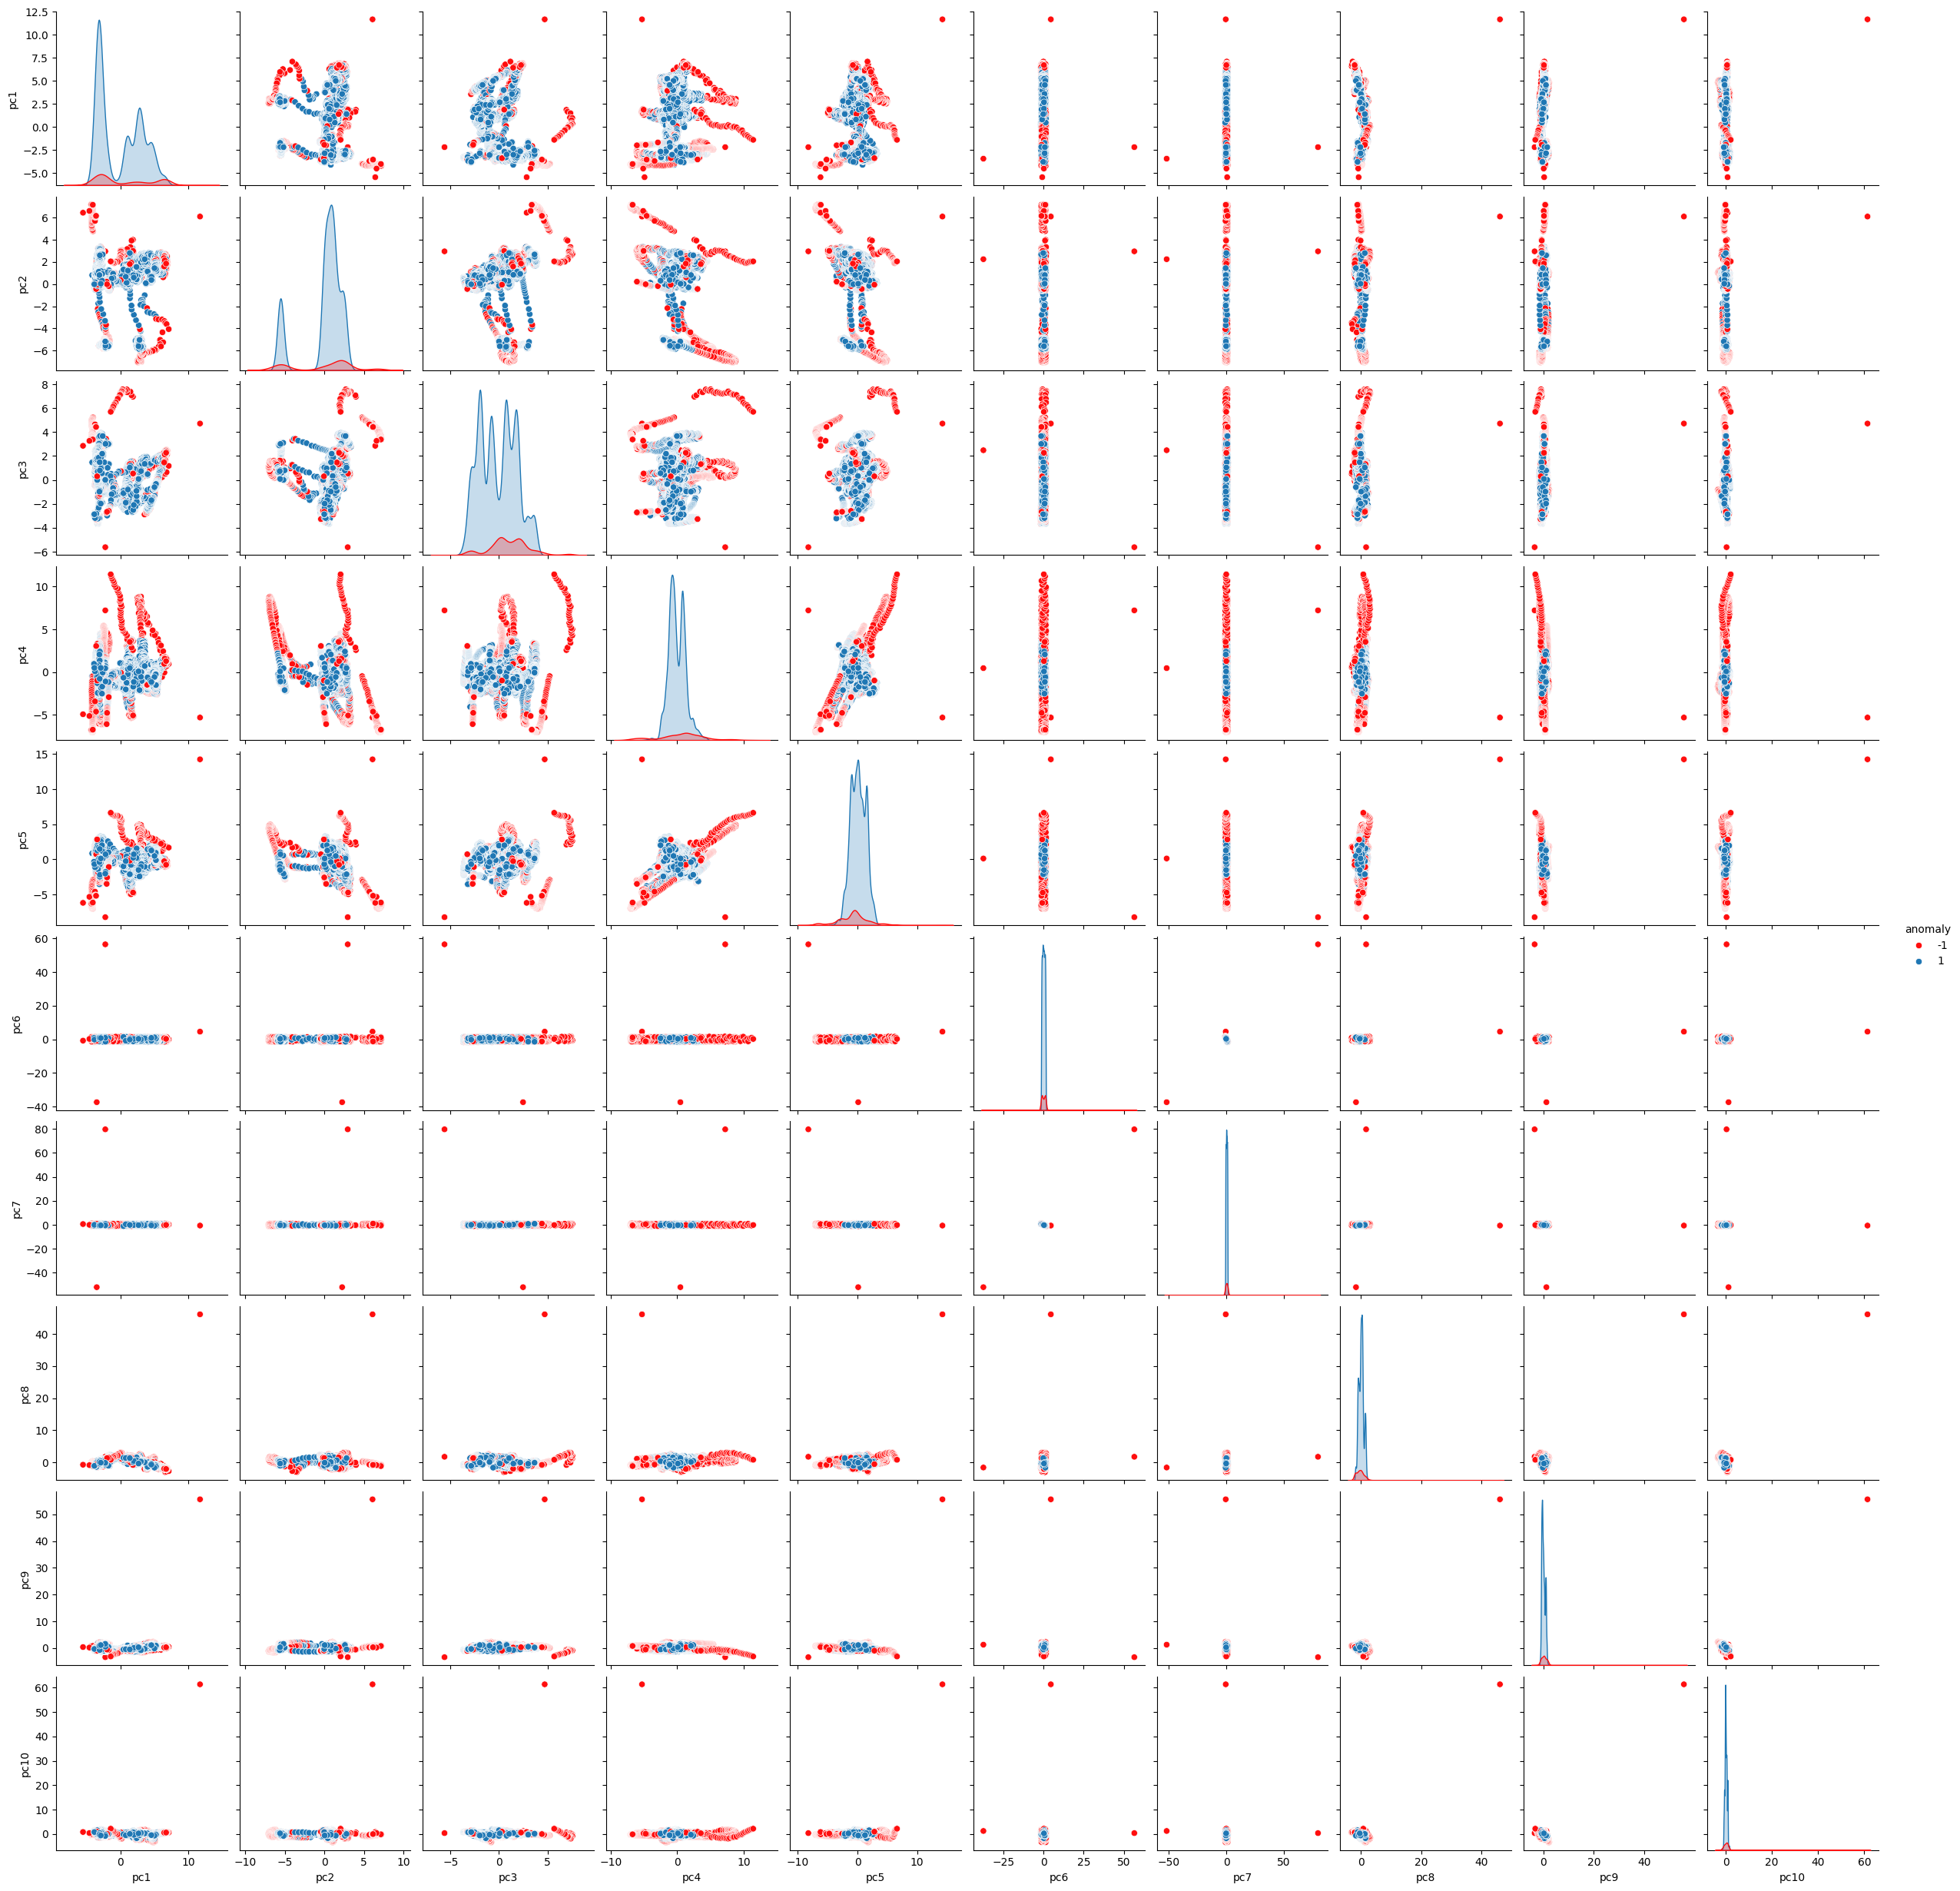

In [31]:
#plot the anomalies
palette=['#ff0e0e','#1f77b4','#03fc28']
sns.pairplot(df_PCA, vars=anomaly_inputs, hue='anomaly', palette=palette)

<h1>6</h1>

<h1>7</h1>

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



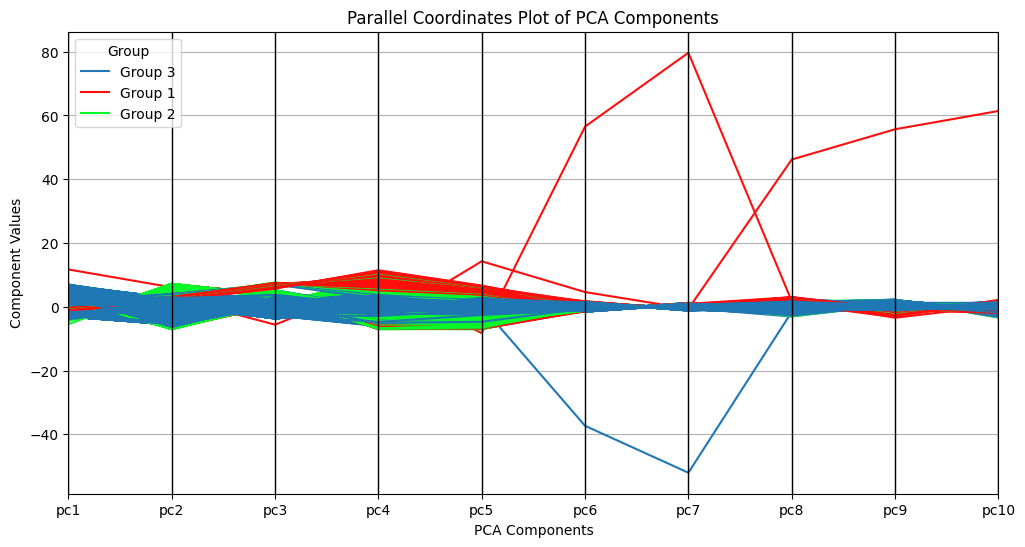

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming df_PCA is your DataFrame and 'group' is the column with group labels
plt.figure(figsize=(12, 6))
parallel_coordinates(df_PCA, 'group', cols=anomaly_inputs, color=['#1f77b4','#ff0e0e', '#03fc28'])
plt.title('Parallel Coordinates Plot of PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.legend(title='Group')
plt.show()


In [98]:
from sklearn.manifold import TSNE

# Fit T-SNE to the PCA components
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_PCA[anomaly_inputs])

# Create a DataFrame for the results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['group'] = df_PCA['group']

color = [ '#1f77b4','#ff0e0e', '#03fc28']
fig = px.scatter_3d(df_tsne, x='TSNE1', y='TSNE2', z='TSNE3', color='group', color_discrete_sequence=color)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

<h1>8</h1>

<h1>9</h1>

<h1>10</h1>

<h1>11</h1>